In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
iris = load_iris()
x = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(x, columns=feature_names)
df["species"] = [target_names[i] for i in y]

In [3]:
feature_names_kr = ["꽃받침 길이", "꽃받침 너비", "꽃잎 길이", "꽃잎 너비"]
target_names_kr = ["세토사", "버시컬러", "버지니카"]

In [4]:
colors = ["#FF6B63", "#4ECDC4", "#45B7D1"]
species_colors = {target_names[i]: colors[i] for i in range(3)}

## 특성 간 관계 분석


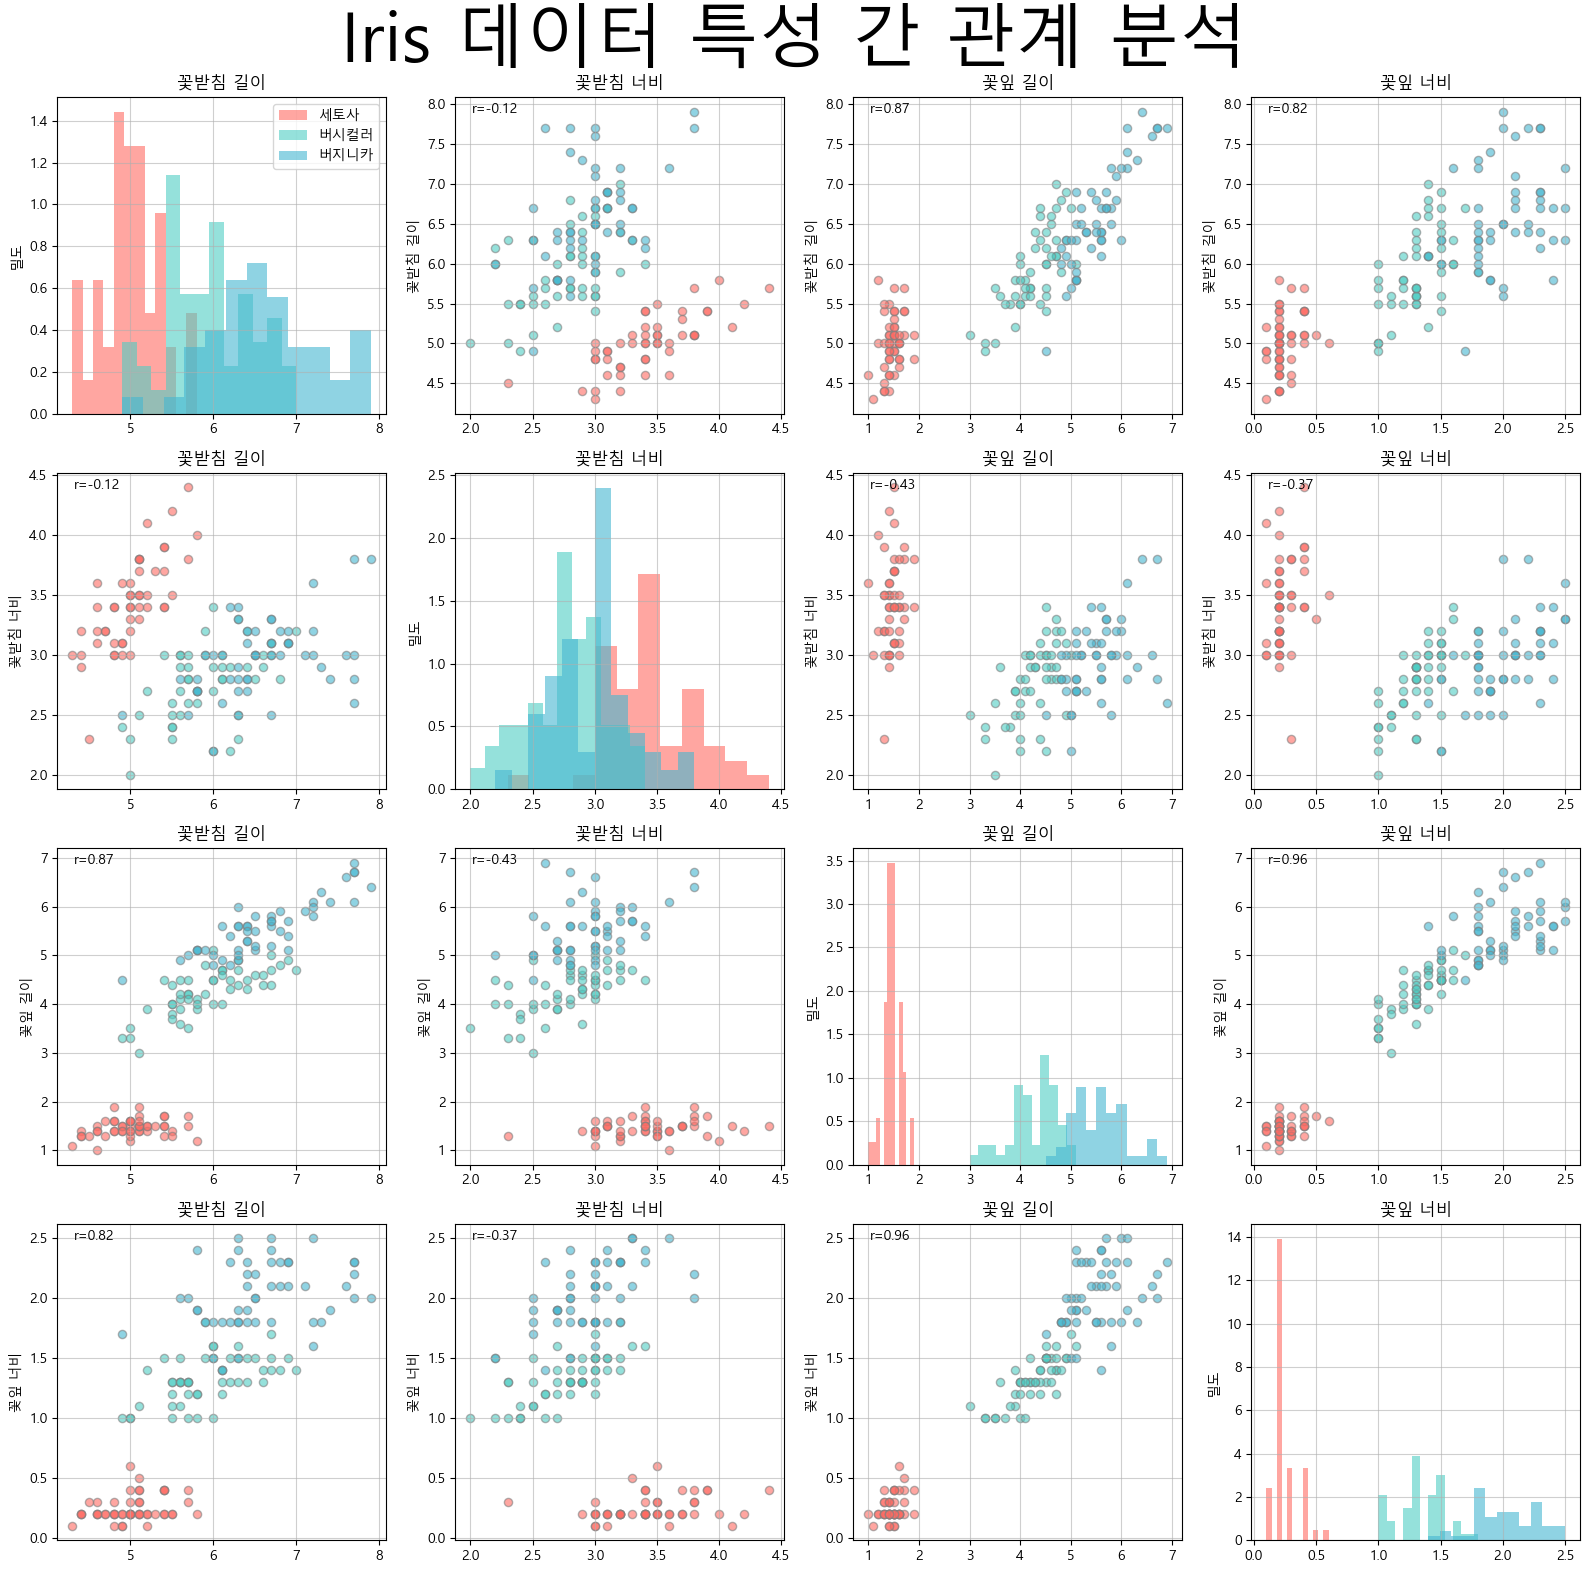

In [ ]:
fig, axes = plt.subplots(4,4, figsize=(16,16))
fig.suptitle("Iris 데이터 특성 간 관계 분석", fontsize=50)

#print(axes.shape)

for i in range(4):
    for j in range(4):
        #print(i,j)
        ax = axes[i,j]
        if i == j:
            # 막대 그래프, 히스토그램
            #ax.plot([1,2], [2,1])
            #density=True 밀도, 이것빼면 갯수
            for k, species in enumerate(target_names):
                data = df[df["species"] == target_names[k]].iloc[:,i]
                ax.hist(data, bins=12, 
                        density=True,
                        color=colors[k], alpha=0.6, label=target_names_kr[k])
            ax.set_title(feature_names_kr[i])
            ax.set_ylabel("밀도")
            if i == 0 :
                ax.legend()
               
        else :
            #산점도
            for k, species in enumerate(target_names):
                data = df[df["species"] == species]
                x = data.iloc[:,j] #주대각선 기준으로 왼/오른 뒤집으면 대칭으로 보여야한다.
                y = data.iloc[:,i] #y종속변수
                #ax.plot([1,2], [2,1])
                ax.scatter(x,y,color=colors[k],alpha=0.6, s=35, edgecolors="gray")
            ax.set_title(feature_names_kr[j])
            ax.set_ylabel(feature_names_kr[i])

            corr = df.iloc[:, [j,i]].corr().iloc[0,1] #상관관계 계수 
            ax.text(0.05, 0.95, f"r={corr:.2f}", transform=ax.transAxes) 
            #상관계수 값을 적어야하면 반드시 좌표 안 왼쪽상단에 넣어라. #축변경 transform=ax.transAxes


        ax.grid(True, alpha=0.6)
   
plt.tight_layout()
plt.show()



In [ ]:
df[df["species"] == "setosa"]

In [ ]:
df[df["species"] == "setosa"].iloc[:,1] # 다들고와 1열을

(array([ 5.,  0., 29.,  7.,  0.,  0.,  7.,  0.,  1.,  1.]),
 array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ]),
 <BarContainer object of 10 artists>)

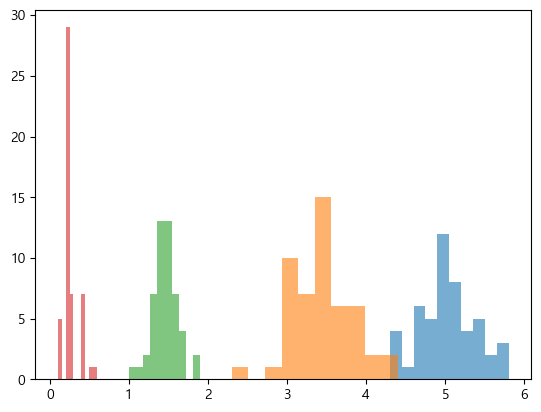

In [18]:
data0 = df[df["species"] == "setosa"].iloc[:,0] 
data1 = df[df["species"] == "setosa"].iloc[:,1] 
data2 = df[df["species"] == "setosa"].iloc[:,2]
data3 = df[df["species"] == "setosa"].iloc[:,3]
plt.hist(data0, alpha=0.6)
plt.hist(data1, alpha=0.6)
plt.hist(data2, alpha=0.6)
plt.hist(data3, alpha=0.6)

(array([ 1.,  5., 12.,  4.,  9.,  8.,  5.,  2.,  1.,  3.]),
 array([4.5 , 4.74, 4.98, 5.22, 5.46, 5.7 , 5.94, 6.18, 6.42, 6.66, 6.9 ]),
 <BarContainer object of 10 artists>)

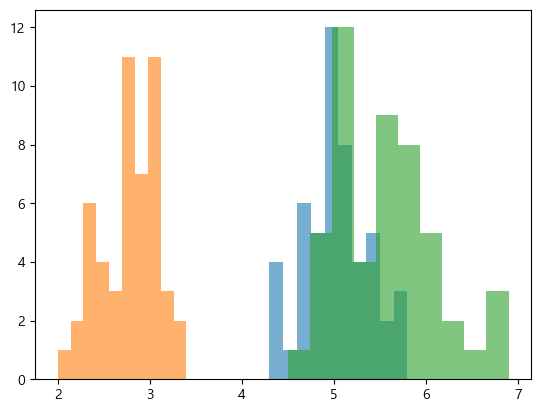

In [19]:
data0 = df[df["species"] == target_names[0]].iloc[:,0] 
data1 = df[df["species"] == target_names[1]].iloc[:,1] 
data2 = df[df["species"] == target_names[2]].iloc[:,2]

plt.hist(data0, alpha=0.6)
plt.hist(data1, alpha=0.6)
plt.hist(data2, alpha=0.6)


In [49]:
df.iloc[:, [0,1]].corr() #상관계수 , 두변수간의 연관성

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


In [50]:
df.iloc[:, [0,1]].corr().iloc[0,1] #특정값

np.float64(-0.11756978413300088)